**Qingbo Liu**

Spring 2020

CS 251: Data Analysis and Visualization

Project 5: Clustering

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

import kmeans

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1: K-means clustering

In this task, you will implement the K-means clustering algorithm and test your code on simple test data.

### 1a) Import `super_simple` data

- In the cell below, use pandas to load in `super_simple.csv` (30 x,y values), convert the Dataframe to a ndarray.
- Create a scatter plot below to see what the data look like.

In [2]:
import pandas as pd

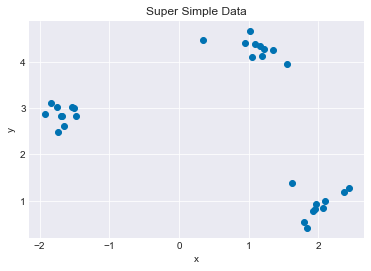

In [3]:
super_simple = pd.read_csv('data/super_simple.csv').values

fig, ax = plt.subplots()
ax.scatter(super_simple[:, 0], super_simple[:, 1])
ax.set_title('Super Simple Data')
ax.set_xlabel('x')
_ = ax.set_ylabel('y')

### 1b) Implement and test core K-means methods

In this task, you will implement the methods needed to cluster a dataset using K-means. The goal of this subtask is to create a scatterplot with each data sample color-coded based on the cluster it belongs to. You will be testing on the `super_simple` data.

In `kmeans.py` implement the following methods, using the following test code to help you out along the way:
- `set_data`: Update the data stored by the k-means clustering object.
- `get_data`: Return a copy of the data.
- `dist_pt_to_pt`: Compute the Euclidean distance from one data sample to one other. See below for formula.
- `dist_pt_to_centroids`: Compute the distance from one data sample to all the cluster centroids.
- `initialize`: Initalize K-means by setting the initial centroids
- `update_labels`: Assign each data sample to the nearest centroid
- `update_centroids`: Calculate each cluster's centroid, given the data samples that are assigned to it.
- `inertia`: Calculate the mean squared distance between each data sample and its (nearest) centroid. This is a 'quality of clustering' performance metric for analysis
- `cluster`: Run K-means to cluster the data. This is the actual method you call to do the clustering (above methods are helper methods).
- `plot_clusters`: Creates a scatterplot of the data (2D only) with data assigned to each cluster sharing the same color.

**Formula for Euclidean distance:**
$$dist \left (\vec{p_0}, \vec{p_1} \right ) = \sqrt{\left (d_{0} - e_{0} \right )^2 + \left (d_{1} - e_{1} \right )^2  + \ldots}$$ for data samples $\vec{p_0} = \left (d_{0}, d_{1}, \ldots \right )$ and $\vec{p_1} = \left (e_{0}, e_{1}, \ldots \right )$

#### Test constructor

In [4]:
cluster = kmeans.KMeans(super_simple)
print(f'Data isnt none? {np.all(cluster.data != None)}')
print(f'Data num samples isnt none? {np.all(cluster.num_samps != None)}')
print(f'Data num samples is {cluster.num_samps} and should be 30.')
print(f'Data num features isnt none? {np.all(cluster.num_features != None)}')
print(f'Data num features is {cluster.num_features} and should be 2.')



Data isnt none? True
Data num samples isnt none? True
Data num samples is 30 and should be 30.
Data num features isnt none? True
Data num features is 2 and should be 2.


#### Test `get_data`

In [5]:
super_simple_cpy = cluster.get_data()
super_simple_cpy[0,:] = -99
if np.all(cluster.data[0,:] == -99):
    print('You didnt return a copy of the data! Re-import the super_simple data and try again...')
else:
    print('All good!')

All good!


#### Test `dist_pt_to_pt`

In [6]:
a = np.array([1, 2, 3, 4])
b = 4*a
print(f'Your pt-to-pt distance is {cluster.dist_pt_to_pt(a, b)}')
print(f'Correct pt-to-pt distance is {np.linalg.norm(a-b)}')

Your pt-to-pt distance is 16.431676725154983
Correct pt-to-pt distance is 16.431676725154983


#### Test `dist_pt_to_centroids`

In [7]:
test_pt = np.array([[1, 2]])
test_centroids = np.array([[9, 9], [11, 11], [0, 0]])
print(f'Your pt-to-centroids distance is {cluster.dist_pt_to_centroids(test_pt.flatten(), test_centroids)}')
print(f'Correct pt-to-centroids distance is {distance.cdist(test_pt, test_centroids)}')

Your pt-to-centroids distance is [10.63015 13.45362  2.23607]
Correct pt-to-centroids distance is [[10.63015 13.45362  2.23607]]


#### Test `initialize`

In [8]:
test_k = 3
init_centroids = cluster.initialize(test_k)
print(f'Initial cluster centroids shape is:\n{init_centroids.shape} and should be (3, 2)')

Initial cluster centroids shape is:
(3, 2) and should be (3, 2)


#### Test `update_labels`

In [9]:
# Consistently set initial centroids for test
init_centroids = np.array([[ 0.338, 4.4672], [-1.8401, 3.1123], [1.7931, 0.5427]])

new_labels = cluster.update_labels(init_centroids)
print(f'After the first update data label step, 1st 10 of your cluster assignments are:\n{new_labels[:10]}')
print('Your 1st 10 cluster assignments should be:\n[0. 1. 1. 1. 2. 0. 2. 1. 2. 1.]')

After the first update data label step, 1st 10 of your cluster assignments are:
[0 1 1 1 2 0 2 1 2 1]
Your 1st 10 cluster assignments should be:
[0. 1. 1. 1. 2. 0. 2. 1. 2. 1.]


#### Test `update_centroids`

In [10]:
new_centroids, diff_from_prev_centroids = cluster.update_centroids(test_k, new_labels, init_centroids)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids}')

After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]


You should see:

After the first centroid update, your cluster assignments are:
    
    [[ 1.09087  4.29295]
     [ 2.00717  0.9184 ]
     [-1.68133  2.85917]]
Your difference from previous centroids:
    
    [[ 0.75287 -0.17425]
     [ 0.15877 -0.25313]
     [ 0.21407  0.3757 ]]

#### Test `inertia`

In [11]:
cluster.centroids = new_centroids
cluster.data_centroid_labels = new_labels
print(f'After the first test k-means update, your inertia is:\n{cluster.compute_inertia()}\nIt should be\n0.10738760429999998')

After the first test k-means update, your inertia is:
0.10738760429999998
It should be
0.10738760429999998


#### Test `plot_clusters` and `cluster`

In the cell below:

- Run K-means on the `super_simple` dataset, picking $k$ that makes sense.
- Run `plot_clusters` to generate a scatterplot. Make sure that the cluster assignment looks like the following image:

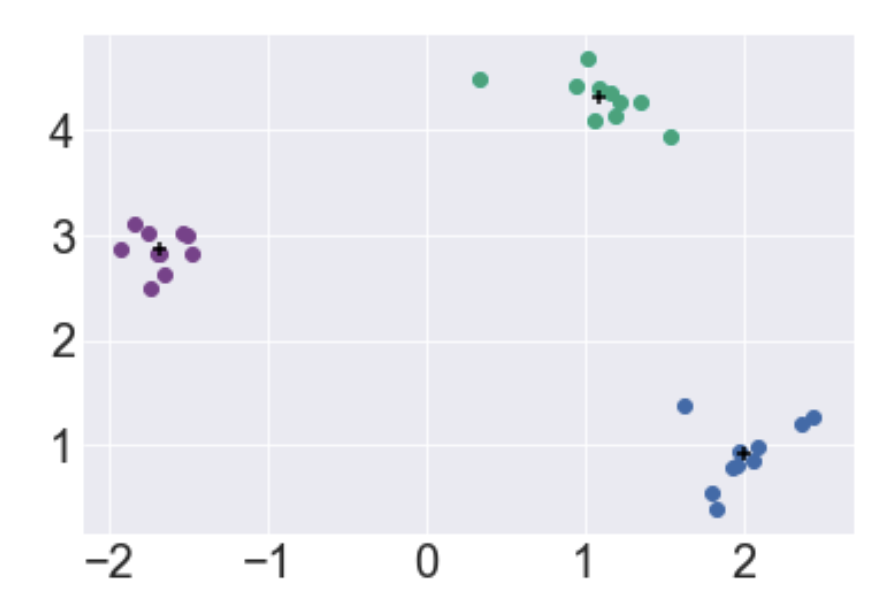

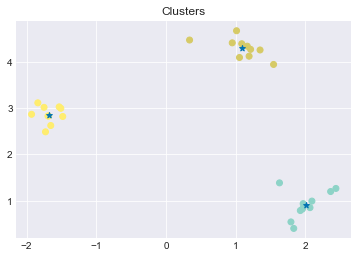

In [12]:
cluster.cluster(k=3)
cluster.plot_clusters()

### 1c) Determining the number of clusters $k$

In this task, you will explore how to determine the number of clusters in a dataset.

- Implement `elbow_plot` in `kmeans.py`.
- Create an elbow plot below for the `super_simple` dataset. It should look like the below image.

**NOTE:** Make sure to include a meaningful x label, y label, and x tick marks.

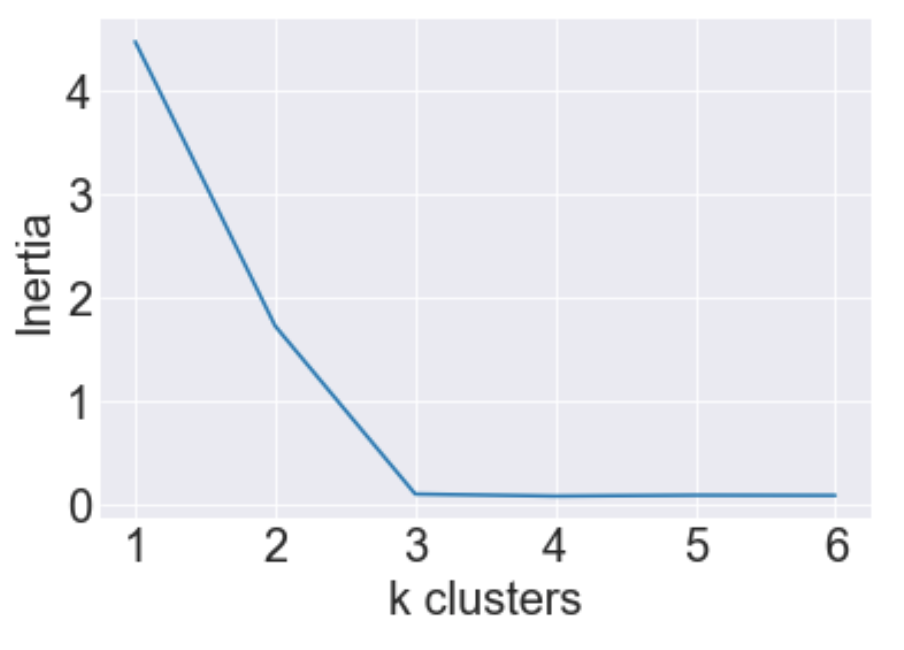

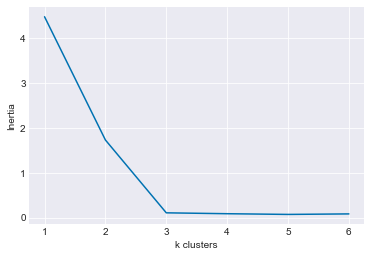

In [13]:
cluster.elbow_plot(7)

**Question 1:** How many clusters are there in the `super_simple` data, based on the elbow plot that you made? Briefly explain how you determined this.

**Answer 1:** There are 3 clusters as the intertia stays stable after 3 and so clusters are fitted to the data. 

#### Determine number of clusters in `five_blobs` dataset

- Load in the `five_blobs` dataset.
- Run K-means on it.
- Create a scatterplot to visualize the clustering.
- Create an elbow plot showing the inertia with different $k$ values

**NOTE:** Keep the random seed line below.

MSSE: 7.116345982439033


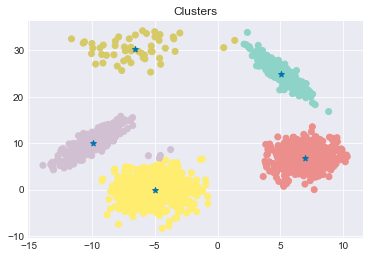

In [14]:
np.random.seed(3)

five_blobs = pd.read_csv('data/five_blobs.csv').values
cluster = kmeans.KMeans(five_blobs)
cluster.cluster(k=5)
cluster.plot_clusters()

print(f'MSSE: {cluster.inertia}')

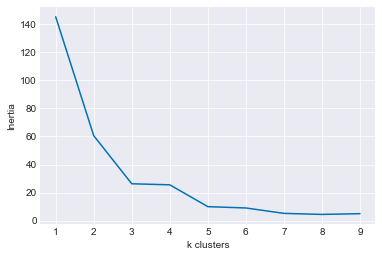

In [15]:
cluster.elbow_plot(10)

**Question 2:** What's wrong with clusters shown in the scatterplot? Why does it happen?

**Answer 2:** There are some points that look visually close to one centroid but gets classified to another centroid. Those points are on the boundary of the neighborhood (in the topological sense) of the centroids. 

**Question 3:** Based on the elbow plot, how many clusters are there? Is it easy or hard to determine? Does it make sense?

**Answer 3:** I think there are 5 clusters as inertia does not change after 5 clusters and the decision is made pretty easily. It makes sense because according to the cluster plot above it looks like there are five clusters in total.

#### Run K-means multiple times, save the best clustering

To address the problems faced above, we can run K-means multiple times and take the best results for our clustering.

- Implement `cluster_batch` to run K-means multiple times with a sensible $k$ value.
- Run `plot_clusters` again.

**NOTE:** Keep the random seed line below.

MSSE: 7.116345982439033


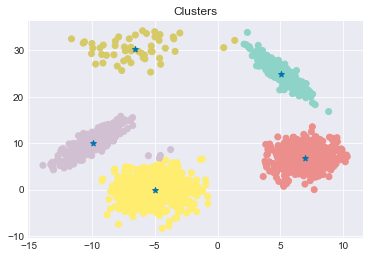

In [16]:
np.random.seed(3)

cluster.cluster_batch(k=5, n_iter=5)
cluster.plot_clusters()

print(f'MSSE: {cluster.inertia}') 

**Question 4:** Did the clustering improve? Why?

**Answer 4:** Not necessarily. MSSEs for both plots are the same and the plots are identical to human eyes. But one thing to note is that when I was experimenting with `cluster` function it sometimes returns not so optimal results. So even though the plots here do not say so, on average the clustering did improve. 
The reason for the improvement is that kmeans is sensitive to initialization conditions. `cluster_batch` improves over `cluster` by randomly initializing multiple times so that in the hope that one set of initialization will result in an optimal initial condition. 

## Task 3) Improved initialization and cluster detection (LA section only)

Here, you will explore a more sophisticated techniques for initializing K-means.

### 3a) K-means++ initialization

- In `kmeans.py::initialize_plusplus` implement the K-means++ initialization algorithm.

Recall that the idea is to set the 1st centroid to be a random data sample. To determine each of the remaining centroids, compute the MINIMUM distance from each data sample to ONLY the centroids ALREADY DEFINED (i.e. what's the closest distance of each point to centroids that are currently defined). For example, if we're determining centroid 3, we would find the distance between each data sample and the closest centroid (1 or 2...whichever is closer). Then, we use these distances to create a probability distribution. The next centroid is determined by selecting a data sample in the dataset according to this probability distribition. The equation for the probability distribution is:$$p(x_i) = \frac{D(x_i)^2}{\sum_{j=1}^N D(x_j)^2}$$ where $D(x_i)$ is the distance between data sample $x_i$ and the nearest centroid already defined and $N$ is the number of data samples, like usual.

- Update `cluster` to take in an optional parameter `init_method='random'`. If the user selects 'random', run the old method. If the user selects 'kmeans++', run the K-means++ initialization.
- Create a scatterplot below with K-means++ initialization

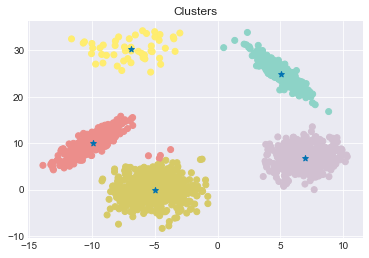

In [17]:
cluster.cluster(k=5, init_method='kmeans++')
cluster.plot_clusters()

**Question a:** Did the clustering get better? Why?

**Answer a:** This has the same result as `cluster_batch` but just requires one deterministic initialiaztion. So in terms of results it is not necessarily better but the procedures run faster. 

#### Compare number of iterations needed for K-means to converge

- Add support for the `init_method` optional parameter in `cluster_batch`.
- Add a return value to `cluster_batch`: the mean number of iterations required for each K-means instance to converge.
- Below, print out the mean number of iterations required for `random` and `kmeans++` initialization methods with the `five_blobs` dataset.

In [18]:
np.random.seed(3)

random_n = cluster.cluster_batch(k=5, n_iter=5, init_method='random')
kpp = cluster.cluster_batch(k=5, n_iter=5, init_method='kmeans++')

print(f'Mean number of iterations\nrandom: {random_n}, kpp: {kpp}')

Mean number of iterations
random: 9.6, kpp: 6.8


**Question b:** Which initialization method is better with respect to number of iterations required to converge?

**Answer b:** Kmeans++ is better as it requires on average 6.8 iterations, while random requires on average 9.6 iterations.

## Task 4) Image Segmentation and compression

In this task, you will apply K-means to one image and to compress it (*image compression*). The idea is that you will find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. This will compress an image, by only using $k$ colors to represent it. You can also think of this as doing a simple image region segmentation: regions with similar colors will belong to the same cluster. It also makes some cool retro effects!

### 4a) Load in baby bird image

- Use the imported `imread` method below to load in the `baby_bird.jpg` image.
- Use `plt.imshow` to display it in the notebook below. Turn off plot ticks!

In [19]:
from matplotlib.image import imread

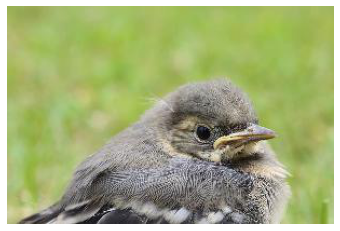

In [20]:
bird = imread('data/baby_bird.jpg')

_, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
_ = ax.imshow(bird)

### 4b) Preprocess image

- Fill in the function below to collapse (flatten) the 2D image into a big 1D vector of RGB values. For example, for the bird image, your function should take the shape `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`.
- Reshape the bird image from `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`. Final shape for baby bird image should be: `(61206, 3)`

In [21]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    H, W, _ = img.shape 
    return img.reshape(H*W, 3)

In [22]:
bird_vec = flatten(bird)
bird_vec.shape

(61206, 3)

### 4c) Cluster RGB values in image

- Run K-means on the bird data vector.
- Implement `replace_color_with_centroid`: replace every pixel in the image with the nearest centroid RGB value.
- Compress the image by running `replace_color_with_centroid`.

In [23]:
cluster = kmeans.KMeans(bird_vec)
cluster.cluster(k=5, init_method='kmeans++')

cluster.replace_color_with_centroid()

### 4d) Postprocessing and visualization

- Rehape the compressed image data back to its original dimensions.
- Plot it below.

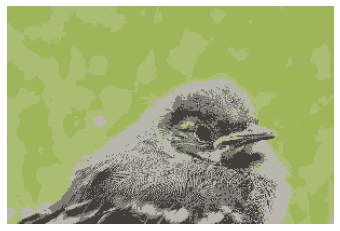

In [24]:
H, W, _ = bird.shape
img = cluster.data 
img = img.reshape([H, W, 3])

_, ax = plt.subplots()
ax.imshow(img)
ax.set_xticks([])
_ = ax.set_yticks([])

### 4e) Run K-means and compress an image of your choice

Smaller images run a lot faster.

I used the image from last project which, albeit larger, has fewer colors and so I expect k-means to run pretty fast on that one.

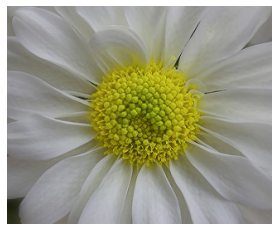

In [25]:
flower = imread('data/flower.jpg')

_, ax = plt.subplots()
ax.imshow(flower)
ax.set_xticks([])
_ = ax.set_yticks([])

In [26]:
flower_vec = flatten(flower)
flower_vec.shape

(84160, 3)

In [27]:
cluster = kmeans.KMeans(flower_vec)

cluster.cluster(k=5, init_method='kmeans++')
cluster.replace_color_with_centroid()

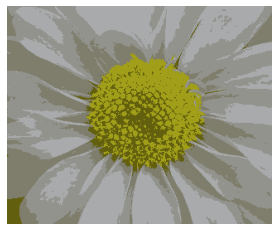

In [28]:
H, W, _ = flower.shape


_, ax = plt.subplots()
ax.imshow(cluster.data.reshape([H, W, 3]))
ax.set_xticks([])
_ = ax.set_yticks([])